## Introduction
Inferential Statistics is the process of examining the observed data (sample) in order to make conclusions about properties/parameter of a Population. 

The conclusion of a statistical inference is called a *statistical proposition*. Some common forms are the following:

+ a point estimate (mean)
+ an interval estimate (confidence interval)
+ rejection of a hypothesis (hypothesis testing)
+ clustering or classification of individual data points into groups (Machine Learning techniques, Regression, Classification)

The classic approach for Inferential Statistics requires to make assumptions about the population distribution - which is **unknown**. If we knew about the Population, there would be no need for Inference!

Hence, using analytical formulas - and making wild assumptions while at it - is not advised. Especially nowadays: with the available processing power and so many readily available programming tools, we can easily make inferences over simulated data distribution.

This notebook will cover **Hypothesis Testing**.

# Hypothesis Testing
Another form of Inferential Statistics, helps to make better and data-informed decisions. This technique is vastly implemented in research, academia, and A/B testing.

1. Translate research question into 2 clearly defined and competing hypothesis: 
    + $H_0:$ **Null**
    + $H_1:$ **Alternative**


2. Collect data (Experiment Design: ideal sample size, how long to conduct, consistency among control and experiment groups *etc.*) to evaluate both hypothesis.

Also:
+ We assume the Null, $H_0$, to be true before even collecting the data (prior belief)
+ $H_0$ always holds some sign of equality sign ($\leq$  $=$  $\geq$)
+ The Alternative, $H_1$, is what we would like to prove to be true
+ $H_1$ always holds the opposite sign of the Null ($>$  $\neq$  $<$) 

## Setting Up Hypothesis
It is usually easier to start defining the Alternative Hypothesis and what sign it should hold: is it bigger? Is it different? Is it smaller?

Then, the Null assumes the opposite sign (with some sort of equality).

+ **Example 1**: The new assembly technique is better than the existing one
    - Measurement: proportion of defective product, $\rho$
    - $H_0: \rho_{new} \geq \rho_{old}$
    - $H_1: \rho_{new} < \rho_{old}$ 
  
    
+ **Example 2**: The average height of coffee drinkers is different than non-coffee drinkers
    - Measurement: average height, $\mu$
    - $H_0: \mu_{Coffee} = \mu_{NonCoffee} $
    - $H_1: \mu_{Coffee} \neq \mu_{NonCoffee} $
  
 
+ **Example 3**: The new website design is better than the existing one
    - Measurement: subscription rate, $\delta$
    - $H_0: \delta_{new} \leq \delta_{old}$
    - $H_1: \delta_{new} > \delta_{old}$  

## Significance Testing
There are two alternative ways of computing the statistical significance of a parameter inferred from a data set, in terms of a test statistic:  **One-tailed** test and a **Two-tailed** test.

+ **One-tailed test**: Used when we are interested in testing if the Alternative is better (lesser or greater than, depending on the metric)
    $$H_1 < 0$$
    $$H_1 >0$$


+ **Two-tailed test**: Used when we are interested in just testing if the Alternative is different
    $$H_1 \neq 0$$

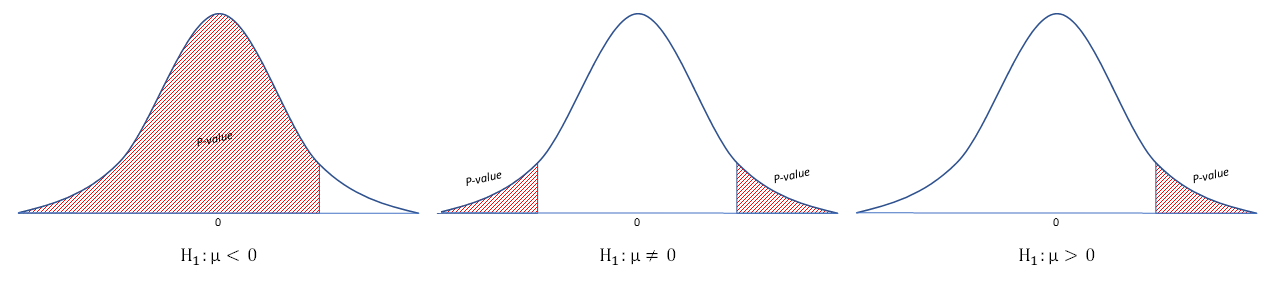

In the image above we see an example of the result for each possible setup of the **Alternative** Hypotheses, being: lesser; different; and greater. 

Where:

+ The Bell curve represents the distribution of all possible values, assuming the **Null** Hypotheses to be true/correct. The blue curve is drawn from the Null, with the mean value as <u>the closest value to the Null</u> (in this case, 0).


+ The hashed area in red is the **p-value**, representing all values that actually support the **Alternative** Hypotheses ("equal or more extreme than"). Note how the hashed area `does not necessarily` starts from <u>the closest value to the Null</u> (in this case, 0).


+ The graphic seen above is the famous Probability Density Function (PDF). The area under this curve represents the probability, which cumulative sum varies between 0 and 1.

Assuming the Null to be true/correct, we draw the blue bell-shaped curve. P-value is the area under this curve (probability) for values that are equal or more extreme than data supporting the Alternative.


>$\implies$ **p-value**: probability of seeing data that actually supports the Alternative, assuming the Null to be true/correct.

## Interpreting the p-value
This is a [very hot topic](https://www.nature.com/articles/d41586-019-00857-9), involving hyped claims and the dismissal of possibly crucial effects, much due to the fact of using "significant results only" ($p-value < \alpha$) as a publishing criteria on peer-reviewed journals.

We never "accept" a Hypothesis, since there is always the chance of it being wrong - even if very small.

Instead, we either **Reject** or **Fail to Reject** the Null:
+ $\downarrow$ **Small p-value**: we Reject the Null. Rather, the statistics is likely to have come from a different distribution.
+ $\uparrow$ **Big p-value**: we Fail to Reject the Null. It is indeed likely the observed statistic came from the distribution assuming the Null to be true.

But what is *small* and *big* ?
<br>
The **p-value** is compared against $\alpha$ (alpha), the rate of **False Positives** we are willing to accept.

### Danger of Multiple Tests
As mentioned before, there is **always** the chance of randomly finding data supporting the Alternative. Even if the p-value is quite small!

For the usually accepted Significance Level of 5% ($\alpha$), it basically means that if we perform the same experiment 20 times ($\alpha^{-1}$), we expect that one of them will result in a False Positive... and we are okay with it!

Whenever replicating the same experiment, or conducting multiple tests (i.e. A/B testing using more than one metric), we need to watch out for compounding of Type I error (error propagation)!

Enter the Correction Methods for multiple tests:
+ **Bonferroni**: $\alpha^* = \frac{\alpha}{n}$
    - The Type I error rate should be the desired $\alpha$, divided by the number of tests, $n$.
    - Example: if replicating the same experiment 20 times, each experiment corrected $alpha^*$ would be $\frac{0.05}{20}$ = 0.0025 (that means, 0.25% instead of the initial 5%).
    - As illustrated in the example above, this method is **very conservative**. While it does minimize the rate of False Positives (making the findings more meaningful), it also fails to recognize actual significant differences. Which increases the amount of Type II error (False Negatives), leading to a test with low **Power**.


+ **Holm-Bonferroni**: recommended approach
    - Less conservative, this adaptation from the Bonferroni method presents a better trade-off between Type I and II errors.
    - It consist of a simple but tricky to explain algorithm. See [this Wikipedia](https://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method) for detailed explanation.
    - I personally created a Python function to implement this method. It receives a list of the identification of the test/metric/experiment, and another with the respective p-value of each individual test/experiment. The output is a list of all tests that have evidence to Reject the Null; and another one with the remaining, where we Fail to Reject the Null.

## Pitfalls
1. When interpreting statistical significance results, we assume the **sample** is truly representative of the **Population** of interest. 
    - It is important to watch out for **Response Bias**, when only a specific segment of the population is captured in the sample
    - Example: people against a bill (or project) are more likely to attend a Public Hearing to manifest their opinion than those in favor.
    

2. With large enough sample size, hypothesis testing leads to even the smallest differences being considered as statistically significant.
    - Hence, it is important to be aware of Practical Significance as well, considering extraneous factors such as: cost, time *etc.*
    - Example: a small improvement in the manufacturing process - even if statistically significant - might not be worth the cost, time, and effort to implement it.

## Decision Errors (False Positive & False Negatives)
Whenever making decisions without knowing the correct answer, we can face 4 different outcomes. Enters the **Confusion Matrix**:

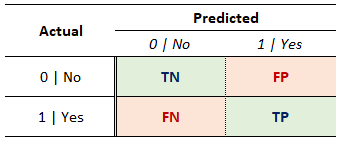

+ **Type I error (False Positive):**
    - Reject the Null when it is actually true
    - The probability of committing a Type I error is represented by $\alpha$ (also know as Significance Level)
    - Not committing it ($1 - \alpha$) is know as **Confidence Level**

+ **Type II error (False Negative):**
    - Fail to reject the Null when it is indeed false
    - Probability of committing a Type II error is represented by $\beta$
    - Not committing it ($1 - \beta$) is known as the **Power** of the test

Common values used in practice are:
+ **Significance Level** ($\alpha$) = 5%
+ **Test Power** ($1 - \beta$)= 80%

Differentiating between Type I (False Positive) and Type II (False Negative) errors can be confusing... until you see this image:

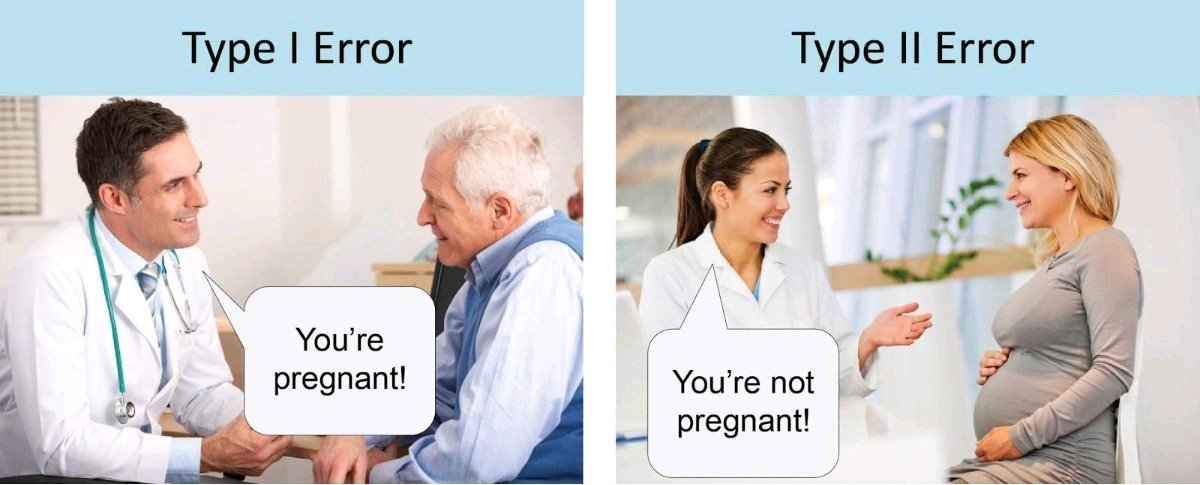